In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

C:\Users\Brand\AppData\Local\Temp\ipykernel_33776\255355394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
cirrhosis_data_path = Path(r"C:\Users\Brand\project_env\Scikit-Learn-Fundamentals\SciKit-Data Science\data\Multi-Class Prediction of Cirrhosis Outcomes")
train_data_path = cirrhosis_data_path / "train.csv"
test_data_path = cirrhosis_data_path / "test.csv"

train_data = pd.read_csv(train_data_path, index_col=0)
test_data = pd.read_csv(test_data_path, index_col=0)

#### What is Cirrohosis
- Scaring or damage of the liver resulting in the liver not functioning properly

In [4]:
train_data.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

In [32]:
train_data.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [6]:
y = train_data["Status"]
X = train_data.drop(columns=["Status"])

In [7]:
categorical_data = X.select_dtypes("object")
numeric_data = X.select_dtypes("float")

In [8]:
categorical_data.head(10)

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
id,,,,,,
0,D-penicillamine,M,N,N,N,N
1,Placebo,F,N,N,N,N
2,Placebo,F,N,Y,Y,Y
3,Placebo,F,N,N,N,N
4,Placebo,F,N,Y,N,N
5,D-penicillamine,F,N,Y,N,N
6,Placebo,F,N,N,N,N
7,Placebo,F,N,Y,N,N
8,D-penicillamine,F,N,N,N,N


In [9]:
numeric_data.head(10)

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,
0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
5,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0
6,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0
7,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0
8,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0


<Axes: >

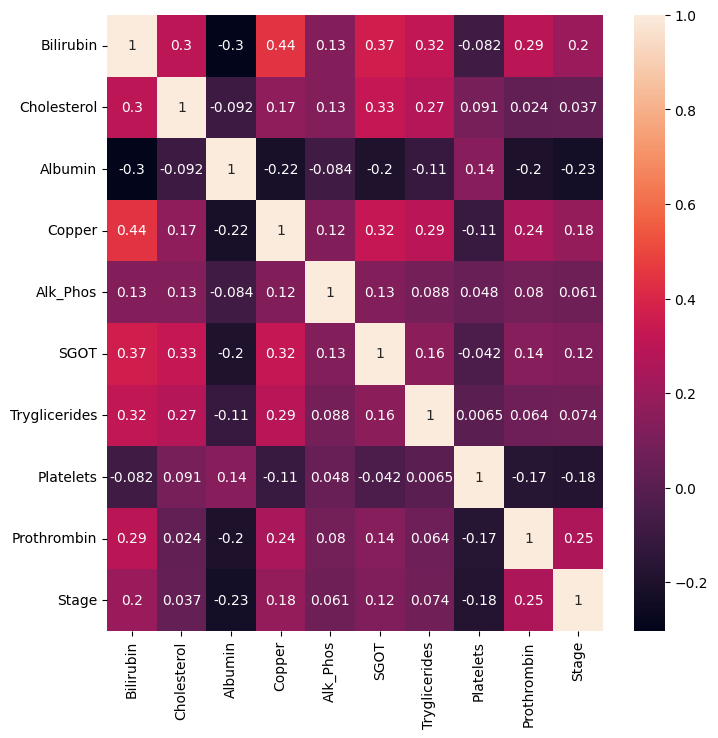

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)

In [34]:
card_series = pd.Series([len(categorical_data[col].unique()) for col in categorical_data.columns], index=categorical_data.columns)

C:\Users\Brand\AppData\Local\Temp\ipykernel_33776\491009295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=card_series, palette="pastel")


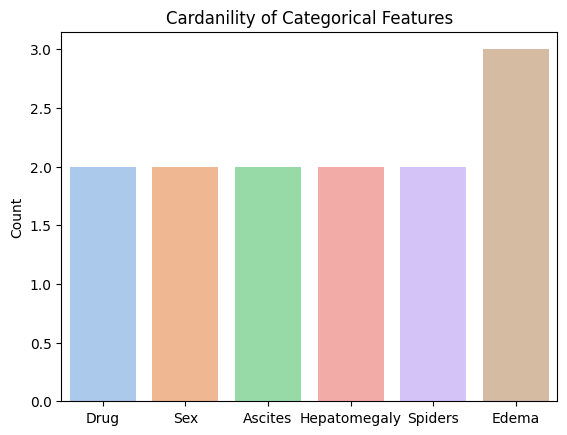

In [21]:
plt.title("Cardanility of Categorical Features")
plt.ylabel("Count")
sns.barplot(data=card_series, palette="pastel")
plt.show()

In [31]:
numeric_data.head(10)
numeric_data[y == "CL"]

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,
88,3.6,348.0,3.80,121.0,979.0,120.90,146.0,142.0,11.1,4.0
166,14.4,1712.0,3.65,89.0,3681.0,158.10,139.0,297.0,10.0,3.0
203,3.2,296.0,3.03,77.0,2276.0,170.50,101.0,372.0,10.2,4.0
218,4.5,460.0,3.74,148.0,1472.0,108.50,118.0,172.0,10.2,4.0
301,1.3,372.0,3.01,227.0,1716.0,167.40,135.0,248.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...
7719,3.4,325.0,3.56,32.0,1664.0,116.25,118.0,217.0,10.2,3.0
7741,2.9,191.0,3.59,77.0,1406.0,190.00,118.0,102.0,11.4,4.0
7751,1.3,674.0,3.65,103.0,620.0,91.45,139.0,165.0,11.0,2.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

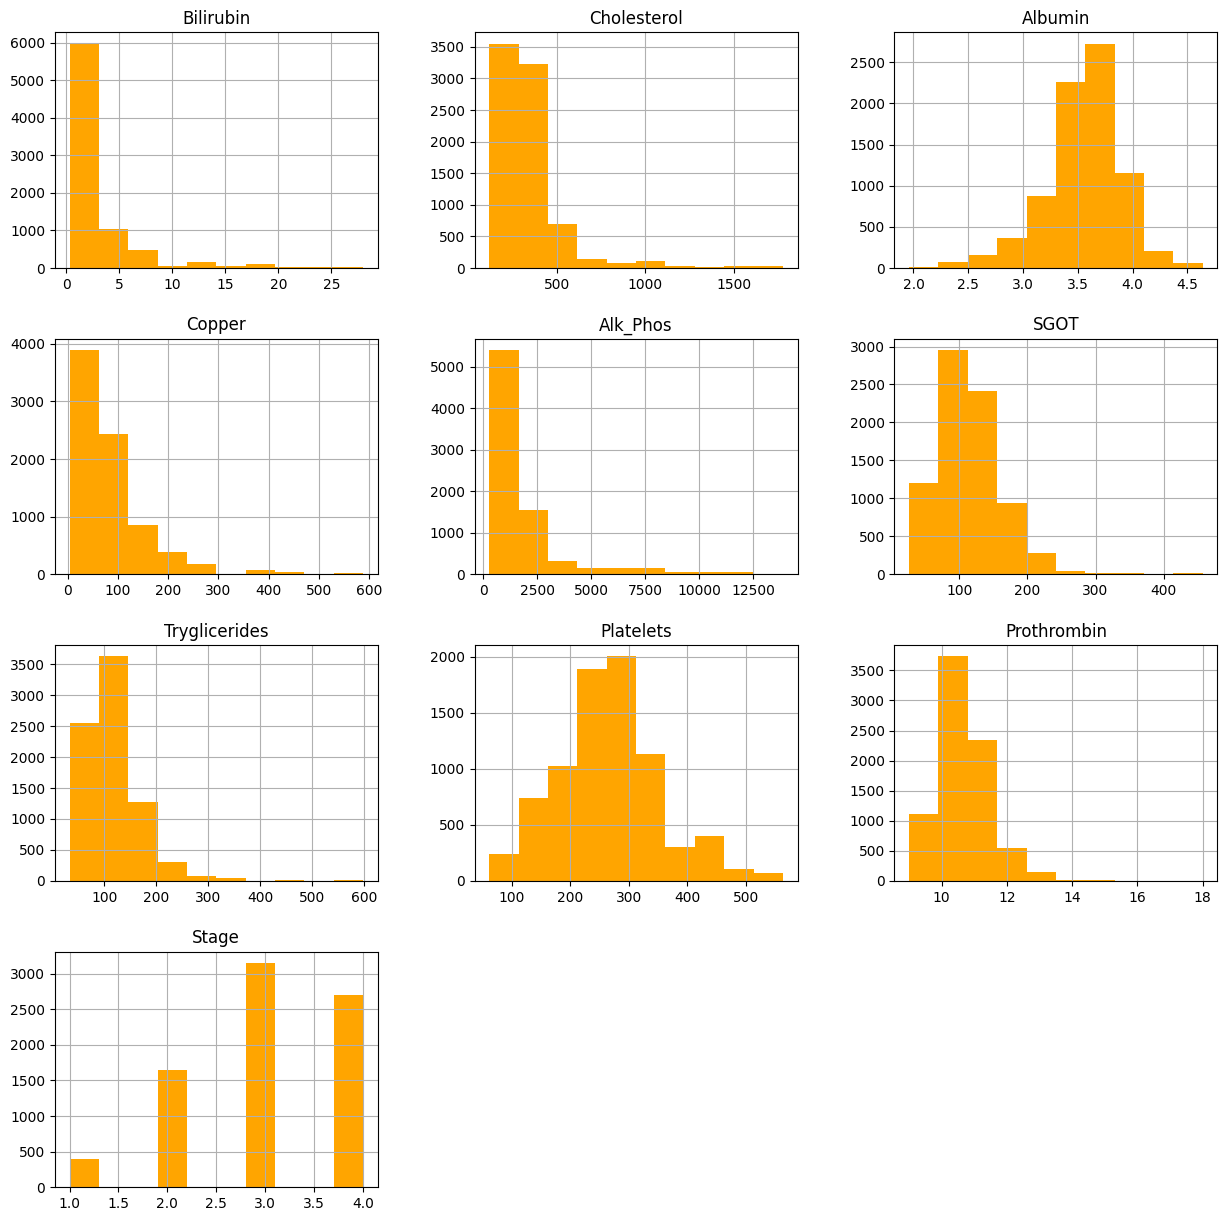

In [43]:
numeric_data.hist(bins=10, figsize=(15,15), color="orange")
plt.show()